### Stack(스택)
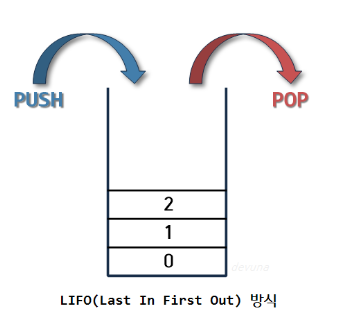

### 1.1 Stack 성질

- 같은 구조와 크기의 자료를 정해진 방향으로만 쌓을 수 있음
- top으로 정한 곳을 통해서만 접근할 수 있음
- top의 가장 위에 있는 자료는 가장 최근에 들어온 자료를 가르키며, 삽입되는 자료는 top이 가리키는 자료의 위에 쌓이게 됨
- 스택에서 자료를 삭제할 때도 top을 통해서만 가능함
- 스택에서 top을 통해 삽입하는 연산 `push`
- top을 통해 삭제하는 연산 `pop`
- 시간 순서에 따라 자료가 쌓여서 가장 마지막에 삽입된 자료가 가장 먼저 삭제되는 구조적 특성`(후입선출LIFO, Last-In-First-Out)`
- 비어있는 스택에서 원소를 추출하려고 할때 stack underflow
- 스택이 넘치는 경우 stack overflow

<장점>
- 구조가 단순해서, 구현이 쉬움
- 데이터 저장/읽기 속도가 빠름

<단점>
- 일반적인 스택 구현시, 데이터 최대 갯수를 미리 정해야함(파이선의 경우 재귀 함수는 1000번까지만 호출 가능)
- 저장공간의 낭비가 발생할 수 있음(미리 최대 갯수 만큼 저장 공간을 확보해야 함)


### 1.2 Stack 활용 예시

- 후입선출(LIFO)을 활용해 여러 분야에서 활용 가능
- 웹 브라우저 방문기록(뒤로가기) : 가장 나중에 열린 페이지부터 다시 보여줌
- 역순 문자열 만들기 : 가장 나중에 입력된 문자부터 출력함
- 실행 취소(undo) : 가장 나중에 실행된 것부터 실행을 취소한다
- 후위 표기법 계산
- 수식의 괄호 검사 (연산자 우선순위 표현을 위한 괄호 검사)

### 1.3 Stack 구현

- 파이썬은 스택 자료 구조를 따로 제공하지 않아, 리스트를 통해 스택 구현 가능

In [29]:
class Empty(Exception):
    pass

class Stack:
    def __init__(self):
        self.box = []
        
    def push(self, item):
        self.box.append(item)
        
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self.box.pop()
    
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self.box[-1]
    
    def size(self):
        return len(self.box)
    
    def is_empty(self):
        return len(self.box) ==0
        

In [3]:
s = Stack()
item = ['red', 'orange', 'yellow', 'greeen', 'blue', 'navy', 'purple']

s.push(item[0])
s.push(item[1])
s.push(item[2])
s.push(item[3])
print(s.top)
print(s.pop())
print(s.pop())
print(s.size())

<bound method Stack.top of <__main__.Stack object at 0x00000182F77E8B48>>
greeen
yellow
2


- limit 제한을 둔 Stack

In [47]:
class lisit_Stack():
    def __init__(self, limit=10):
        self._stack = list()
        self._limit = limit
        
    def push(self, data):
        try :
            if len(self._stack) < self._limit:
                self._stack.append(data)
            
            else :
                raise Exception('Stack Overflow')
                
        except Exception as e:
            print(e)
            
    def top(self):
        return self._stack[-1]
    
    def pop(self):
        try:
            if len(self._stack) != 0:
                return self._stack.pop()   

            else:
                raise Exception('Stack underflow')
                  
        except Exception as e:
            print(e)

    def empty(self):
        if len(self._stack) == 0:
            return 1
        else : 
            return 0
        
    def __str__(self):
        return self._stack
    
    
if __name__ == '__main__':
    stack = lisit_Stack(limit=3)
    stack.push(1)
    print(stack.__str__())
    stack.push(2)
    print(stack.__str__())
    stack.push(3)
    print(stack.__str__())
    stack.push(4)
    print(stack.__str__())
    print(stack.pop())
    print(stack.__str__())
    print(stack.pop())
    print(stack.__str__())
    print(stack.pop())
    print(stack.__str__())
    print(stack.pop())

[1]
[1, 2]
[1, 2, 3]
Stack Overflow
[1, 2, 3]
3
[1, 2]
2
[1]
1
[]
Stack underflow
None


- 리스트 변수로 스택을 다루는 pop, push 구현(pop, push 함수 사용하지 않고 직접 구현)

In [26]:
stack_list = list()

def push(data):
    stack_list.append(data)
    
def pop():
    data = stack_list[-1]
    del stack_list[-1]
    return data

In [27]:
push(1)
push(2)
push(3)
push(4)
push(5)

In [28]:
print(pop())
print(pop())
print(pop())
print(pop())
print(pop())
print(pop())

5
4
3
2
1


IndexError: list index out of range

### 1-4. 스택 예제

#### (1)  십진법을 이진법으로 바꾸기 (Decimal to Binary)

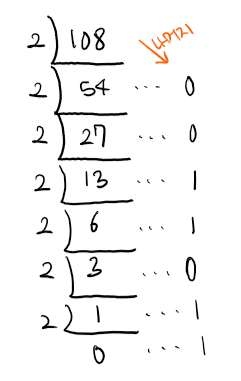

-'순서대로' 나온 결과(나머지 값)를 '뒤집으면' 구하고자 하는 값이 된다는 점에서 스택 구조를 이용하면 간단하게 값을 구할 수 있음 

In [7]:
def decimal_to_binary(num):
    s = Stack()

    while num%2 > 0:
        r = num%2
        s.push(r)
        num = num //2
    
    bin_string = ''
    while s.size() != 0:
        bin_string = bin_sting + str(s.pop())
        
    return bin_string

        
print(decimal_to_binary(108))

#### (2) bracket balance check (괄호의 열림과 닫힘 매칭이 되는지 체크하기)

In [11]:
def bracket_checker(string:str):
    checker = Stack()
    for s in string:
        if s != ')':
            checker.push(s)
        
        else :
            if checker.size()!=0:
                checker.pop()
            
            else :
                return False
            
    if checker.size()!=0:
        return False
    
    else :
        return True
    
True_example = ['((()))', '(()()())', '((())(()))','()']
False_example = ['((()', '(()()())))', '()))','()))())']

result1 = [bracket_checker(i) for i in True_example]
print(result1)

result2 = [bracket_checker(i) for i in False_example]
print(result2)


[True, True, True, True]
[False, False, False, False]


#### (3) 재귀 함수의 예

In [13]:
def recursive(data):
    if data < 0 :
        print('end')
        
    else:
        print(data)
        recursive(data -1)
        print('returned', data)
        
recursive(4)

4
3
2
1
0
end
returned 0
returned 1
returned 2
returned 3
returned 4


#### (4) 괄호문법 체크
[(5+x) - (y+z)]

- 1) 순서대로 하나씩 읽음
- 2) 왼쪽 부호를 만나는 경우 스택에 push
- 3) 오른쪽 부호를 만나면 스택에서 pop
- 4) 왼쪽 부호와 오른쪽 부호가 같은지 확인

In [31]:
def is_matched(expression):
    left = "{[("
    right = "}])"
    S = Stack()
    
    for e in expression:
        if e in left:
            S.push(e)
            
        elif e in right:
            if S.is_empty():
                return False
            
            # 오른쪽 부호가 E.pop()의 리턴값과 쌍을 이루는지 확인하고, 아니라면 False 반환
            if right.index(e) != left.index(S.pop()):
                return False
            
    return S.is_empty()

In [32]:
y = '[(5+x)-(y+z)]'

print(is_matched(y))

True


#### (5) 백준(BOJ) 9012번 - 괄호

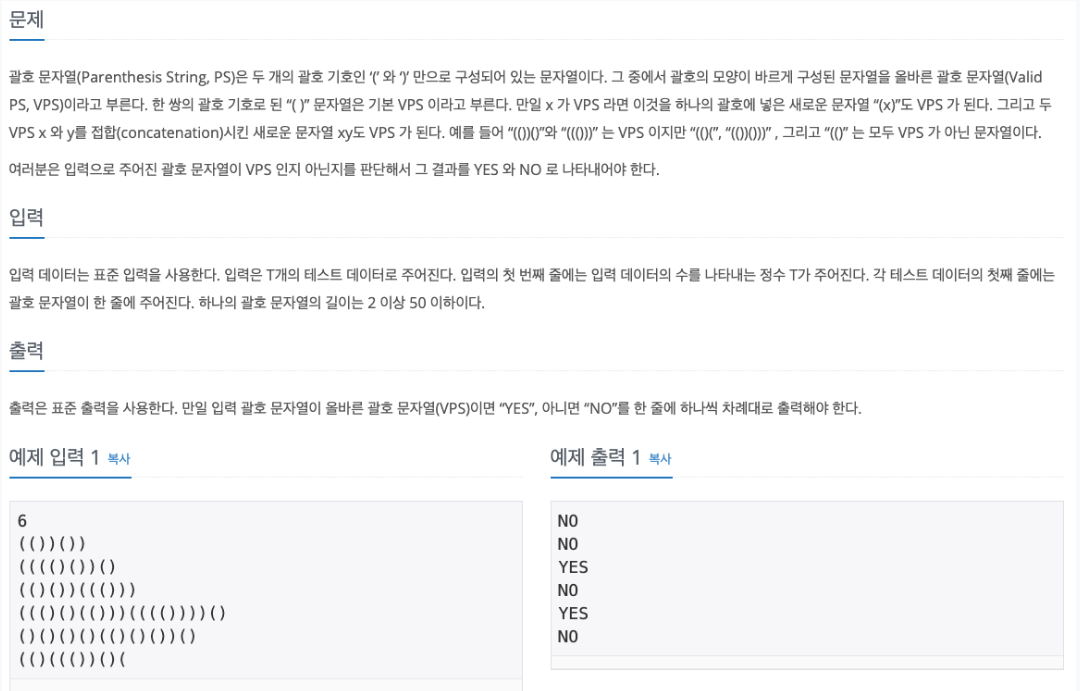

In [57]:
import sys

def stack_push(stack, data):
    stack.append(data)
    
def stack_pop(stack):
    last = stack.pop()
    return last

T = int(sys.stdin.readline()) # 케이스 횟수 

In [58]:
is_VPS('(())())')
is_VPS('(((()())()')
is_VPS('(()())((()))')
is_VPS('((()()(()))(((())))()')
is_VPS('()()()()(()()())()')
is_VPS('(()((())()(')

NO
YES
YES


### 백준 10828번 
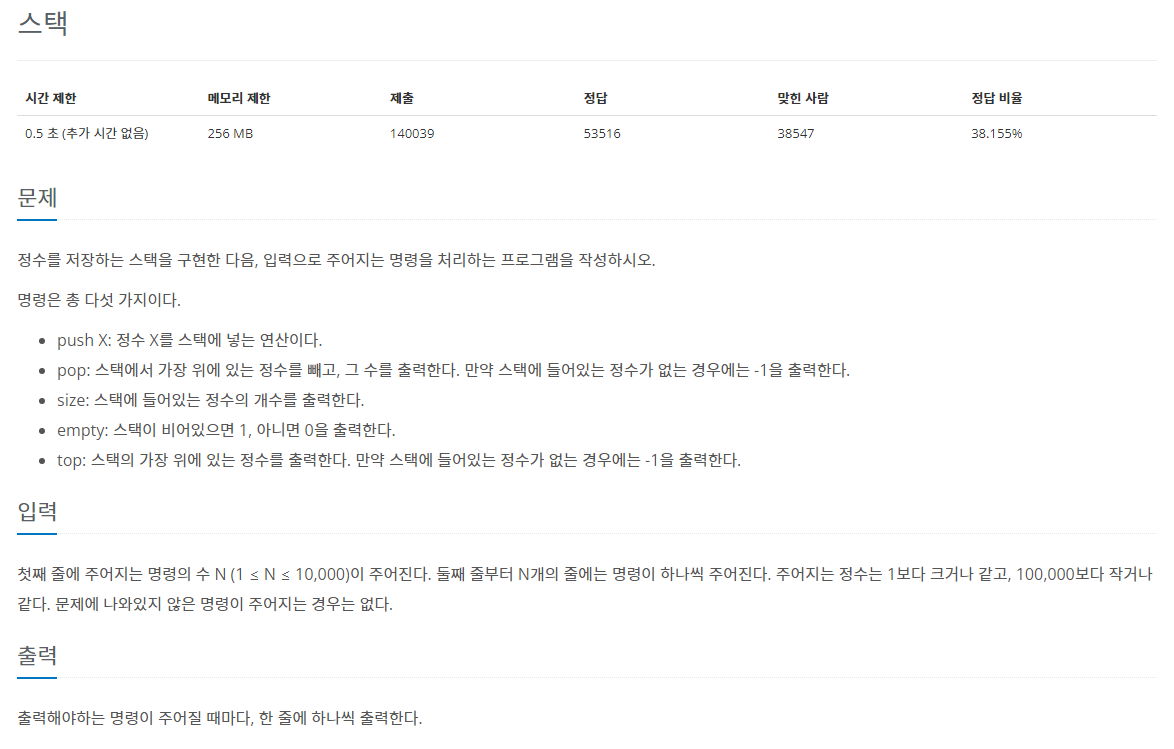
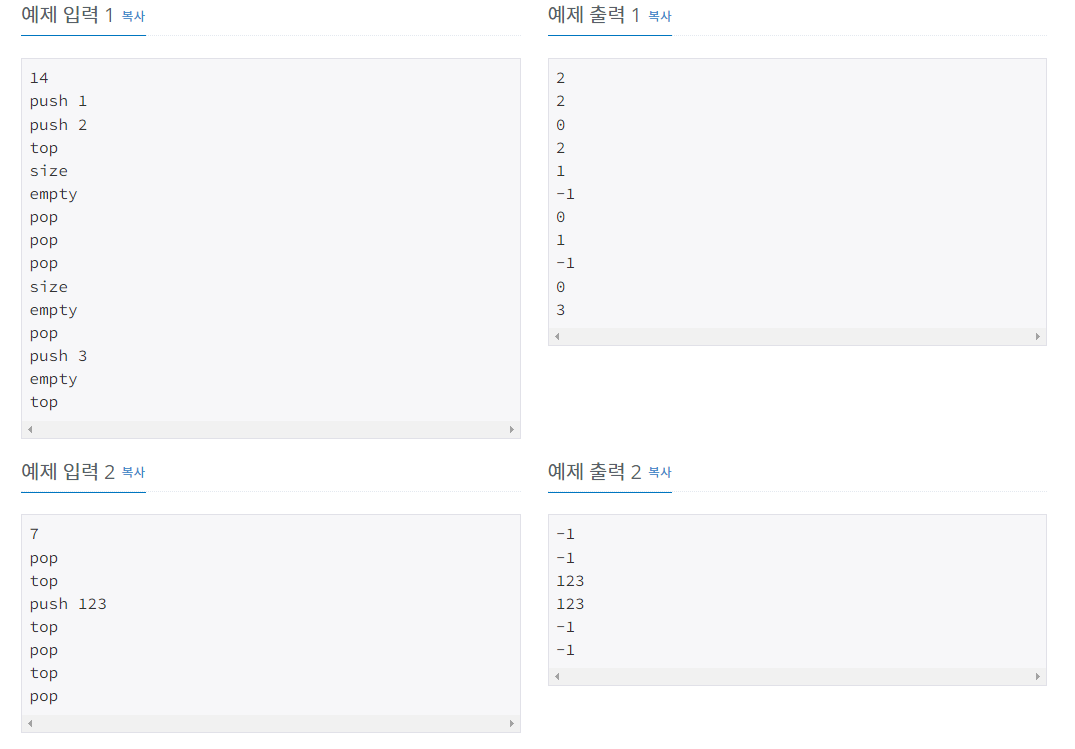